In [1]:
import graphs
import percolation
import random
import numpy as np
import matplotlib.pyplot as plt

number_of_nodes = 50
X = []
prefAttachment = []
erdos_renyi = []

for i in range(25, number_of_nodes):

    X.append((2 + 2*i)/(i + 2))

    numInfected1 = percolation.calculateFinalInfectionPrefAttach(1, [[0,1], [1,0]], [0,1], 2, i, 100, 0.9, 0.1)
    prefAttachment.append(numInfected1)

    numInfected2 = percolation.calculateFinalInfectionErdosReyni(1, i + 2, 2*i + 2, 100, 0.9, 0.1)
    erdos_renyi.append(numInfected2)    


plt.plot(X, prefAttachment, label="Preferential Attachment Graph")
plt.plot(X, erdos_renyi, label="Erdos Reyni Graph")
plt.legend()
plt.xlabel('Average Node Degrees')
plt.ylabel('Total Size of Infection')
plt.title('Infection Spread for Different Average Node Degrees')




KeyboardInterrupt: 

In [ ]:
import graphs
import percolation
import random
import numpy as np
import matplotlib.pyplot as plt

number_of_nodes = 50
X = []
prefAttachment = []
erdos_renyi = []

for i in range(1, number_of_nodes):

    X.append(i + 2)

    X.append((2 + 2*i)/(i + 2))

    numInfected1 = percolation.calculateFinalInfectionPrefAttach(1, [[0,1], [1,0]], [0,1], 2, i, 100,  0.9, 0.1)
    prefAttachment.append(numInfected1)

    numInfected2 = percolation.calculateFinalInfectionErdosReyni(1, i + 2, 2*i + 2, 100, 0.9, 0.1)
    erdos_renyi.append(numInfected2)    

plt.plot(X, prefAttachment, label="Preferential Attachment Graph")
plt.plot(X, erdos_renyi, label="Erdos Reyni Graph")
plt.legend()
plt.xlabel('Number of Nodes')
plt.ylabel('Total Size of Infection')
plt.title('Infection Spread for Different Average Node Degrees')

In [ ]:
import graphs
import percolation
import random
import numpy as np
import matplotlib.pyplot as plt

X = []
Y = []

for numEdge in range(300, 700, 50):
    probabilities = np.arange(0, 1.1, 0.1)
    for perc_prob in probabilities:
            X.append(perc_prob)
            Y.append(percolation.calculateFinalInfectionErdosReyni2(1, 100, numEdge, 100, perc_prob))
plt.scatter(X, Y, label = 'Number of edges:' + str(numEdge))
plt.xlabel('Percolation Probability')
plt.ylabel('Total Number of Infected Nodes')
plt.title('Number of nodes: 100')
plt.legend()


In [ ]:
import graphs
import percolation
import random
import numpy as np
import marko
import matplotlib.pyplot as plt

X = []
Y = []
probabilities = np.arange(0, 1.01, 0.02)

for perc_prob in probabilities:
    X.append(perc_prob)
    Y.append(percolation.calculateFinalInfectionErdosReyni2(1, 100, 500, 100, perc_prob))
plt.plot(X, Y, label = 'Percolation')

X = []
Y = []
for perc_prob in probabilities:
    X.append(perc_prob)
    Y.append(percolation.calculateFinalInfectionErdosReyni2(1, 100, 500, 100, perc_prob))
plt.plot(X, Y, label = 'Markovian SIR')

plt.xlabel('Percolation Probability')
plt.ylabel('Total Number of Infected Nodes')
plt.title('Number of nodes: 100; Number of edges:500')
plt.legend()


In [ ]:
import graphs
import percolation
import random
import numpy as np
import matplotlib.pyplot as plt

transmission_rates = np.arange(0, 1.1, 0.2)
recovery_rates = np.arange(0, 1.1, 0.2)
for beta in transmission_rates:
    X = []
    Y = []
    for rho in recovery_rates:
        perc_prob = beta / (beta + rho)
        X.append(perc_prob)
        Y.append(percolation.calculateFinalInfectionErdosReyni2(1, 100, 500, 100, perc_prob))
    plt.plot(X, Y, label = 'transmission rate: ' + str(beta))
plt.xlabel('Percolation Probability')
plt.ylabel('Total Number of Infected Nodes')
plt.title('Number of nodes: 100; Number of edges:500')
plt.legend()


In [3]:
numTrials = 100
import configuration_model
import numpy as np
import signal
from contextlib import contextmanager

class TimeoutException(Exception): pass

@contextmanager
def time_limit(seconds):
    def signal_handler(signum, frame):
        raise TimeoutException("Timed out!")
    signal.signal(signal.SIGALRM, signal_handler)
    signal.alarm(seconds)
    try:
        yield
    finally:
        signal.alarm(0)


print('Degree Distribution -- 1:0.5, 2:0.5')
print('Expected Giant Component Size: 0')
size = []
n = 500
i = 0
while (i < numTrials):
  try:
    with time_limit(1):
      graph = configuration_model.config_model({1:1/2, 2:1/2}, n)
      size.append(max(configuration_model.findComponentSizes(graph, n)))
      i += 1
  except TimeoutException as e:
    i += 0
mean = np.mean(size)
print('Configuration Model: ' + str(mean))


print('Degree Distribution -- 1:0.9, 6:0.1')
print('Expected Giant Component Size: 206.4')
size = []
i = 0
while (i < numTrials):
  try:
    with time_limit(1):
      graph = configuration_model.config_model({1:9/10, 6:1/10}, n)
      size.append(max(configuration_model.findComponentSizes(graph, n)))
      i += 1
  except TimeoutException as e:
    i += 0
mean = np.mean(size)
print('Configuration Model: ' + str(mean))


print('Degree Distribution -- 1:1/2, 3:1/2')
print('Expected Giant Component Size: 407.4')
size = []
i = 0
while (i < numTrials):
  try:
    with time_limit(1):
      graph = configuration_model.config_model({1:1/2, 3:1/2}, n)
      size.append(max(configuration_model.findComponentSizes(graph, n)))
      i += 1
  except TimeoutException as e:
    i += 0
mean = np.mean(size)
print('Configuration Model: ' + str(mean))


print('Degree Distribution -- 1:1/4, 2:1/2, 3:1/4')
print('Expected Giant Component Size: 425.7')
size = []
i = 0
while (i < numTrials):
  try:
    with time_limit(1):
      graph = configuration_model.config_model({1:1/4, 2:1/2, 3:1/4}, n)
      size.append(max(configuration_model.findComponentSizes(graph, n)))
      i += 1
  except TimeoutException as e:
    i += 0
mean = np.mean(size)
print('Configuration Model: ' + str(mean))

Degree Distribution -- 1:0.5, 2:0.5
Expected Giant Component Size: 0
Configuration Model: 15.32
Degree Distribution -- 1:0.9, 6:0.1
Expected Giant Component Size: 206.4
Configuration Model: 159.98
Degree Distribution -- 1:1/2, 3:1/2
Expected Giant Component Size: 407.4
Configuration Model: 392.46
Degree Distribution -- 1:1/4, 2:1/2, 3:1/4
Expected Giant Component Size: 425.7
Configuration Model: 418.16


/Users/senemisik/Documents/GitHub/CURIS2021/markovian_SIR.py:43: RuntimeWarning: divide by zero encountered in double_scalars
  inf_time = time + np.random.exponential(1/transmissionRate)
/Users/senemisik/Documents/GitHub/CURIS2021/correlated_percolation.py:20: RuntimeWarning: divide by zero encountered in double_scalars
  transmissionTime = np.random.exponential(1/transmissionRate)


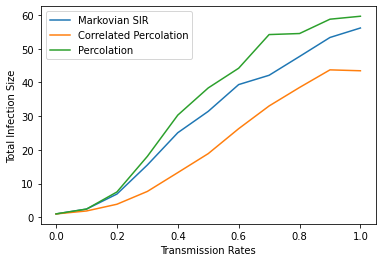

In [4]:
import correlated_percolation
import graphs
import markovian_SIR
import numpy as np
import random
import percolation
import matplotlib.pyplot as plt

class Node:
  def __init__(self, name, status, pred_inf_time, rec_time):
    self.name = name
    self.status = status
    self.pred_inf_time = pred_inf_time
    self.rec_time = rec_time

numOfNodes = 100
numOfEdges = 250
betas = np.arange(0, 1.1, 0.1)
recoveryRate = 0.3
numOfInfectedNodes = 1
Y1 = []
Y2 = []
Y3 = []

for transmissionRate in betas:
    SIR = []
    correlated = []
    normal_percolation = []
    for _ in range(1000):
        random_graph = graphs.erdos_renyi_graph(numOfNodes, numOfEdges)
        neighbors_per_node = correlated_percolation.tuples_to_dict(random_graph, numOfNodes)

        nodes = []
        for name in neighbors_per_node:
            node = Node(name, None, None, None)
            nodes.append(node)
        infection = markovian_SIR.process_SIR_model(nodes, neighbors_per_node, transmissionRate, recoveryRate, random.sample([i for i in range(0, numOfNodes)], numOfInfectedNodes), 1000)[-1][-1]
        SIR.append(infection)

        neighbors_per_node = correlated_percolation.tuples_to_dict(random_graph, numOfNodes)
        graph = correlated_percolation.percolation(random_graph, neighbors_per_node, transmissionRate, recoveryRate)
        neighbors_per_node = correlated_percolation.tuples_to_dict(graph, numOfNodes)
        infected_nodes = len(correlated_percolation.find_entire_connection(random.sample([i for i in range(0, numOfNodes)], numOfInfectedNodes), neighbors_per_node))
        correlated.append(infected_nodes)

        graph = percolation.percolation1(random_graph, transmissionRate, recoveryRate)
        infected_nodes = percolation.find_entire_connection(random.sample([i for i in range(0, numOfNodes)], numOfInfectedNodes), graph, numOfNodes)
        normal_percolation.append(len(infected_nodes))

    Y1.append(np.mean(SIR))
    Y2.append(np.mean(correlated))
    Y3.append(np.mean(normal_percolation))


plt.plot(betas, Y1, label="Markovian SIR")
plt.plot(betas, Y2, label="Correlated Percolation")
plt.plot(betas, Y3, label="Percolation")
plt.xlabel("Transmission Rates")
plt.ylabel("Total Infection Size")
plt.legend()